In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from ramannoodles import spectrafit

In [2]:
from ramannoodles import shoyu
import pandas as pd
import math
from ramannoodles import peakidentify

In [5]:
# you will need to download the file yourself from the team google drive and edit location
df = pd.read_excel('../development/FormicAcid_3percentconc_400C_5s_00000.xlsx', names=('x', 'y'))

In [6]:
df.head()

,x,y
0,252.5710,-10.500840
1,254.8003,0.000000
2,257.0291,-11.261033
3,259.2572,1.535447
4,261.4848,-1.935974


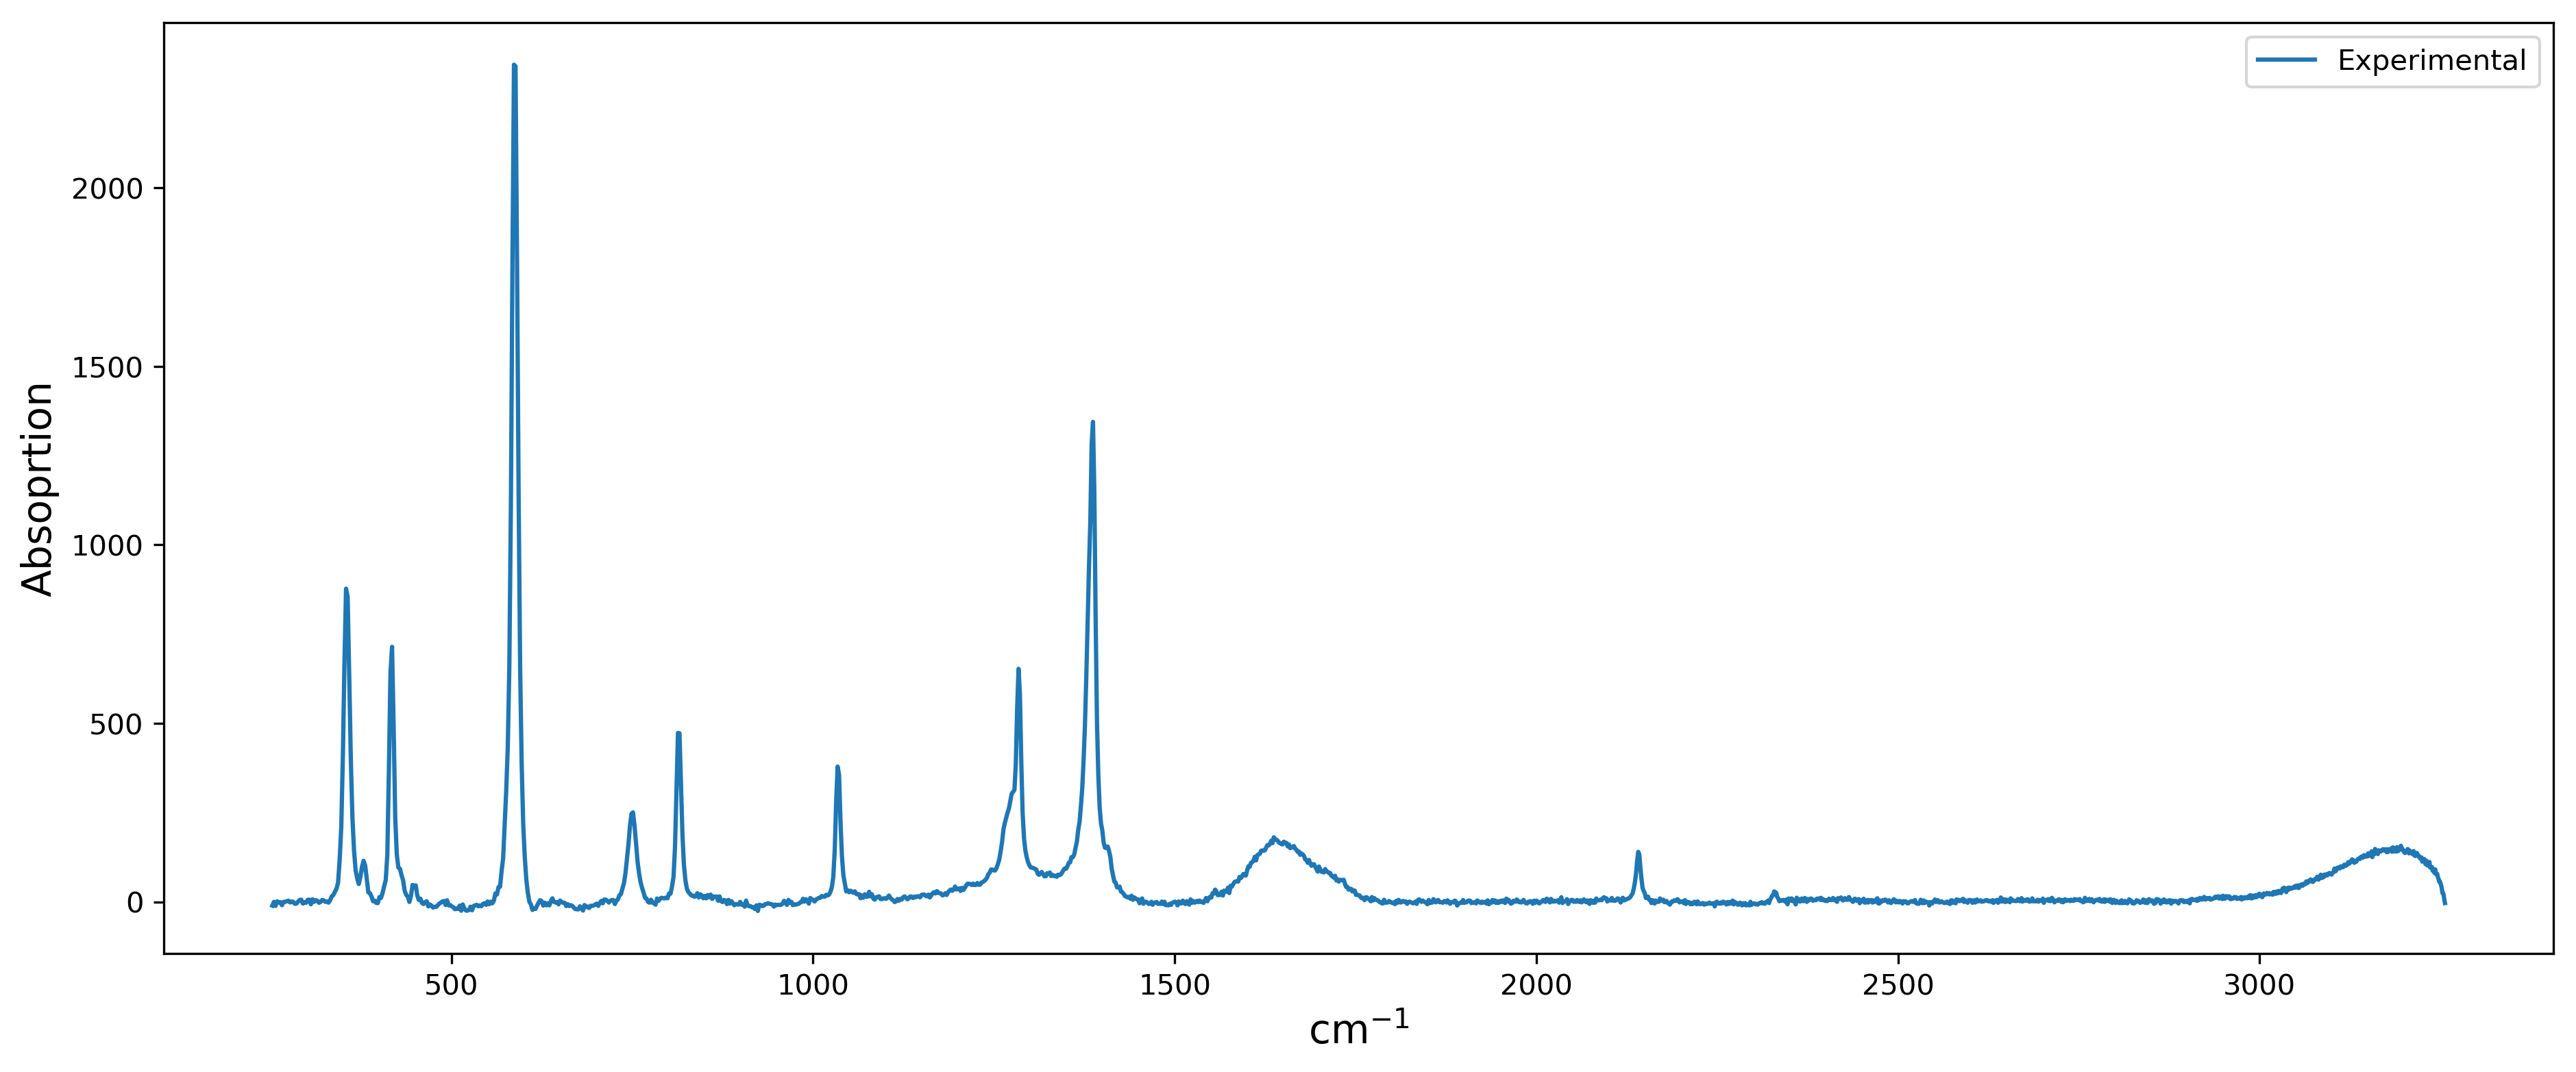

In [7]:
x_data = df['x'].values
y_data = df['y'].values
fig = plt.figure(figsize=(15,6), dpi = 300)
plt.plot(x_data, y_data, label ='Experimental')
plt.xlabel('cm$^{-1}$', fontsize=14)
plt.ylabel('Absoprtion', fontsize=14)
plt.legend()

In [8]:
peaks = spectrafit.find_peaks(x_data, y_data, prominence=0.5)
peaks

(array([], dtype=int64),
 {'peak_heights': array([], dtype=float64),
  'prominences': array([], dtype=float64),
  'left_bases': array([], dtype=int64),
  'right_bases': array([], dtype=int64)})

In [9]:
peaks, peak_list1 = spectrafit.peak_detect(x_data, y_data, height=10, prominence=20)
peaks

[(354.5165, 877.176390406904),
 (378.7089, 114.940949472093),
 (418.138, 714.251100091957),
 (446.4909, 47.3226086034324),
 (586.6575, 2344.58449867747),
 (751.2143, 250.659842290594),
 (813.4106, 473.004788959111),
 (1034.0963, 378.889783389021),
 (1284.2183, 652.628191493507),
 (1387.1289, 1344.26315387477),
 (1637.1264, 180.945603787174),
 (2140.9271, 140.072686446499),
 (2328.892, 29.2055912331114),
 (2432.1446, 13.5784513703811),
 (3195.3272, 157.147798670859)]

In [10]:
mod, pars = spectrafit.set_params(peaks)
out = spectrafit.model_fit(x_data, y_data, mod, pars)
print(out.fit_report())

[[Model]]
    ((((((((((((((Model(pvoigt, prefix='p1_') + Model(pvoigt, prefix='p2_')) + Model(pvoigt, prefix='p3_')) + Model(pvoigt, prefix='p4_')) + Model(pvoigt, prefix='p5_')) + Model(pvoigt, prefix='p6_')) + Model(pvoigt, prefix='p7_')) + Model(pvoigt, prefix='p8_')) + Model(pvoigt, prefix='p9_')) + Model(pvoigt, prefix='p10_')) + Model(pvoigt, prefix='p11_')) + Model(pvoigt, prefix='p12_')) + Model(pvoigt, prefix='p13_')) + Model(pvoigt, prefix='p14_')) + Model(pvoigt, prefix='p15_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7784
    # data points      = 1940
    # variables        = 45
    chi-square         = 1695810.94
    reduced chi-square = 894.887042
    Akaike info crit   = 13230.0630
    Bayesian info crit = 13480.7330
[[Variables]]
    p1_fraction:    0.41705790 (init = 0.5)
    p1_sigma:       5.25081362 (init = 50)
    p1_center:      354.5165 (fixed)
    p1_amplitude:   11153.9283 (init = 1)
    p1_fwhm:        10.5016272 == '2.000

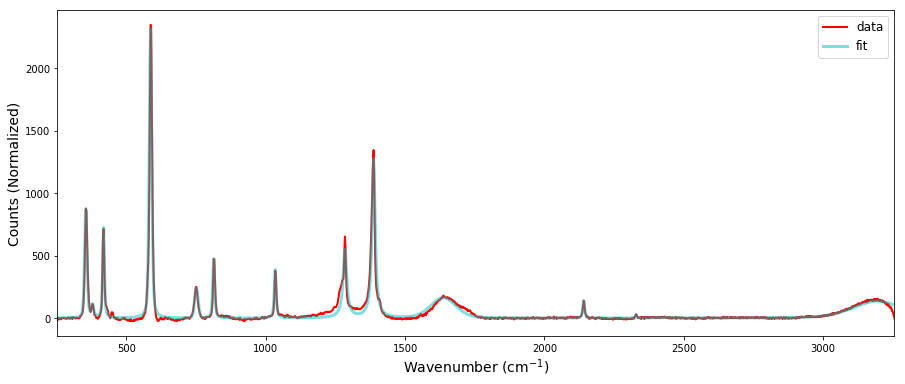

In [11]:
spectrafit.plot_fit(x_data, y_data, out, plot_components=False)

In [12]:
# spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [13]:
formic_fit = spectrafit.export_fit_data(out)

In [14]:
formic_fit

[array([4.17057904e-01, 5.25081362e+00, 3.54516500e+02, 1.11539283e+04,
        1.05016272e+01, 8.77176390e+02]),
 array([1.00000000e+00, 4.67812789e+00, 3.78708900e+02, 1.43097576e+03,
        9.35625579e+00, 1.14940949e+02]),
 array([6.60198672e-01, 3.78113878e+00, 4.18138000e+02, 7.37115981e+03,
        7.56227756e+00, 7.14251100e+02]),
 array([  1.        , 313.71169013, 446.4909    ,  23.30862131,
        627.42338025,  47.3226086 ]),
 array([4.78634349e-01, 5.47250431e+00, 5.86657500e+02, 3.18446589e+04,
        1.09450086e+01, 2.34458450e+03]),
 array([6.39032292e-02, 7.50925307e+00, 7.51214300e+02, 3.85881382e+03,
        1.50185061e+01, 2.50659842e+02]),
 array([6.57043603e-01, 4.18852217e+00, 8.13410600e+02, 5.35727112e+03,
        8.37704434e+00, 4.73004789e+02]),
 array([8.63816716e-01, 3.82186082e+00, 1.03409630e+03, 4.36372317e+03,
        7.64372164e+00, 3.78889783e+02]),
 array([1.00000000e+00, 8.07736528e+00, 1.28421830e+03, 1.37953193e+04,
        1.61547306e+01, 6.52

In [40]:
f = h5py.File("Formic_test.hdf5", "r")

In [16]:
f['data/x'] = df['x']

In [17]:
f['data/y'] = df['y']

In [18]:
f['compound'] = 'FormicAcid'

In [19]:
list(f.keys())

['compound', 'data']

In [20]:
list(f['data'].keys())

['x', 'y']

In [21]:
for i, _ in enumerate(formic_fit):
    f['peak/{}'.format(i+1)] = formic_fit[i]

In [22]:
list(f['peak/1'])

[0.41705790413476895,
 5.250813623783351,
 354.5165,
 11153.928258071695,
 10.501627247566702,
 877.176390406904]

In [23]:
list(f['peak'])

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [24]:
f['compound']

<HDF5 dataset "compound": shape (), type "|O">

In [25]:
type(f['compound'])

h5py._hl.dataset.Dataset

In [26]:
type(f['peak/1'])

h5py._hl.dataset.Dataset

In [27]:
type(formic_fit)

list

In [28]:
# you will need to download the file yourself from the team google drive and edit location
df_co2 = pd.read_csv('../dev_2/CO2_100wt%.csv', names=('x', 'y'))

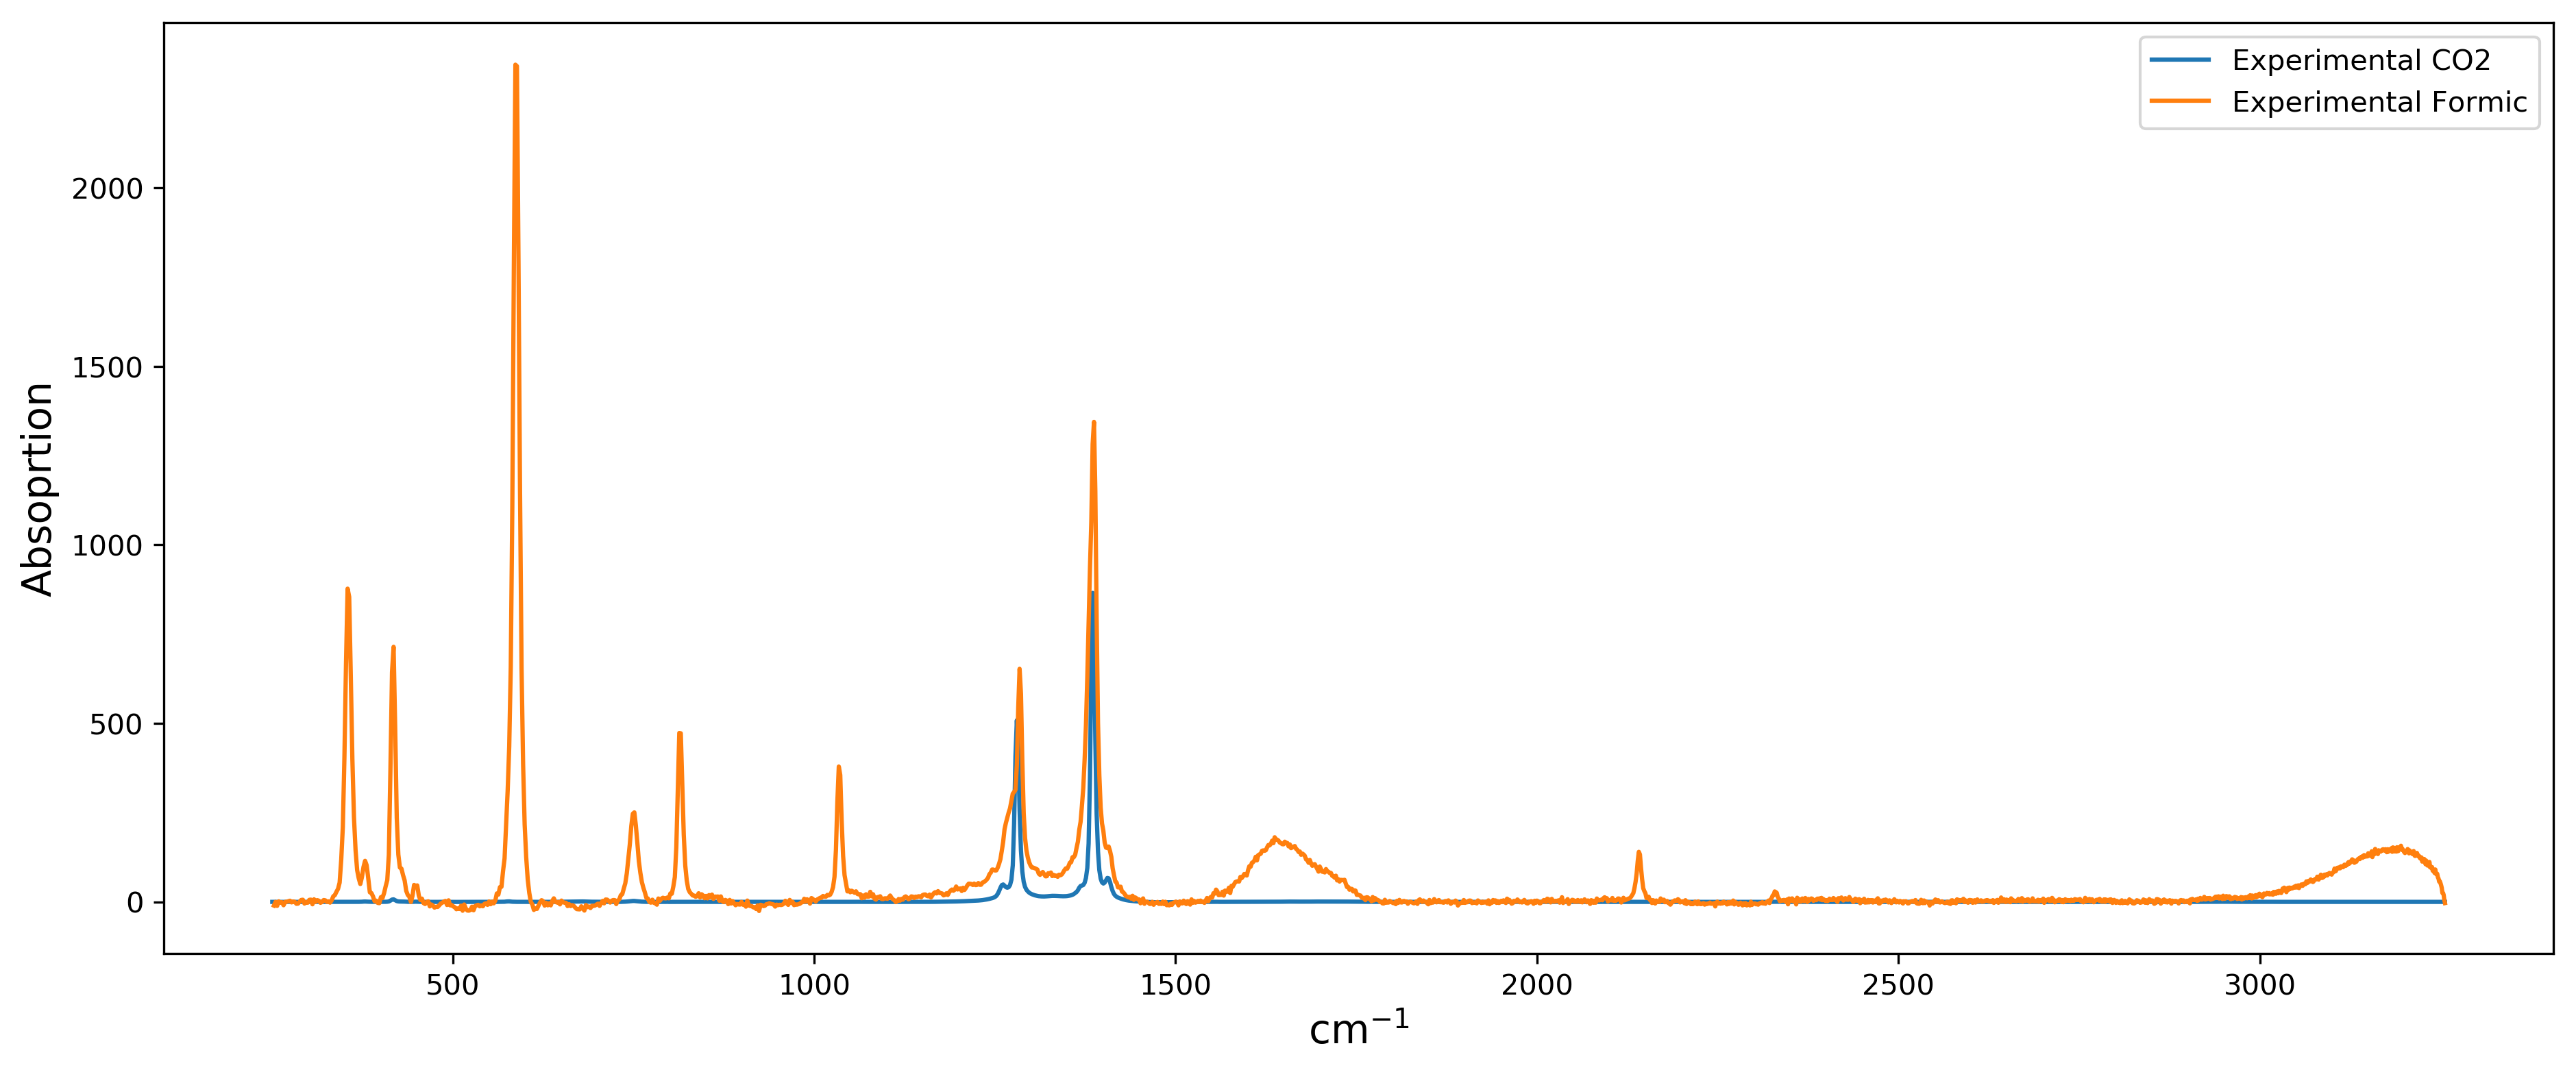

In [31]:
x_data_co2 = df_co2['x'].values
y_data_co2 = df_co2['y'].values
percent=.01
fig = plt.figure(figsize=(15,6), dpi = 300)
plt.plot(x_data_co2, y_data_co2*percent, label ='Experimental CO2')
plt.plot(x_data, y_data, label ='Experimental Formic')
plt.xlabel('cm$^{-1}$', fontsize=14)
plt.ylabel('Absoprtion', fontsize=14)
plt.legend()

In [33]:
peaks_co2, peak_list1_co2 = spectrafit.peak_detect(x_data_co2, y_data_co2, height=10, prominence=20)
peaks_co2

[(378.71, 92.02),
 (418.14, 700.0),
 (448.67, 52.273999999999994),
 (578.11, 132.05),
 (677.88, 111.618),
 (751.21, 256.778),
 (829.89, 12.31288),
 (1053.9, 16.5956),
 (1261.5, 4869.78),
 (1280.4, 50855.4),
 (1331.3, 1690.2),
 (1385.3, 86531.6),
 (1405.6, 6692.12),
 (1556.0, 23.1328),
 (1659.8, 77.7378),
 (1706.4, 100.50200000000001),
 (1787.9, 29.77018),
 (2330.3, 45.9926),
 (2608.0, 10.43816),
 (2951.5, 40.0068)]

In [34]:
peak_list1_co2

(array([  58,   76,   90,  150,  197,  232,  270,  381,  488,  498,  525,
         554,  565,  648,  707,  734,  782, 1132, 1338, 1630], dtype=int64),
 {'peak_heights': array([9.202000e+01, 7.000000e+02, 5.227400e+01, 1.320500e+02,
         1.116180e+02, 2.567780e+02, 1.231288e+01, 1.659560e+01,
         4.869780e+03, 5.085540e+04, 1.690200e+03, 8.653160e+04,
         6.692120e+03, 2.313280e+01, 7.773780e+01, 1.005020e+02,
         2.977018e+01, 4.599260e+01, 1.043816e+01, 4.000680e+01]),
  'prominences': array([9.28082700e+01, 7.17592200e+02, 5.24649886e+01, 1.39088020e+02,
         1.13433300e+02, 2.69792080e+02, 2.20287400e+01, 2.71379800e+01,
         8.91300000e+02, 4.93447200e+04, 1.13760000e+02, 8.65541652e+04,
         1.55172000e+03, 2.37017860e+01, 2.44400000e+01, 1.15590000e+02,
         2.92165100e+01, 6.00480000e+01, 2.11439000e+01, 4.79687200e+01]),
  'left_bases': array([   3,    3,   87,  124,  170,  124,  248,  248,  124,  124,  518,
          124,  562,  605,  605,  6

In [35]:
mod, pars = spectrafit.set_params(peaks_co2)
out = spectrafit.model_fit(x_data_co2, y_data_co2, mod, pars)
print(out.fit_report())

[[Model]]
    (((((((((((((((((((Model(pvoigt, prefix='p1_') + Model(pvoigt, prefix='p2_')) + Model(pvoigt, prefix='p3_')) + Model(pvoigt, prefix='p4_')) + Model(pvoigt, prefix='p5_')) + Model(pvoigt, prefix='p6_')) + Model(pvoigt, prefix='p7_')) + Model(pvoigt, prefix='p8_')) + Model(pvoigt, prefix='p9_')) + Model(pvoigt, prefix='p10_')) + Model(pvoigt, prefix='p11_')) + Model(pvoigt, prefix='p12_')) + Model(pvoigt, prefix='p13_')) + Model(pvoigt, prefix='p14_')) + Model(pvoigt, prefix='p15_')) + Model(pvoigt, prefix='p16_')) + Model(pvoigt, prefix='p17_')) + Model(pvoigt, prefix='p18_')) + Model(pvoigt, prefix='p19_')) + Model(pvoigt, prefix='p20_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10750
    # data points      = 1941
    # variables        = 60
    chi-square         = 1.5955e+08
    reduced chi-square = 84822.5711
    Akaike info crit   = 22086.1363
    Bayesian info crit = 22420.3938
[[Variables]]
    p1_fraction:    1.00000000 (init = 0

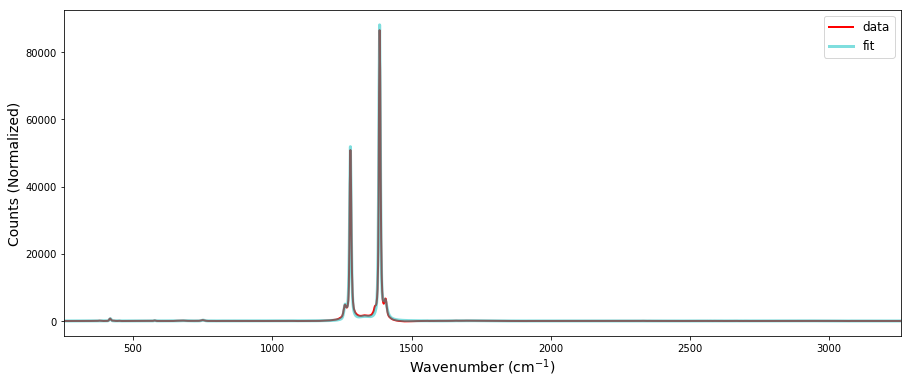

In [36]:
spectrafit.plot_fit(x_data_co2, y_data_co2, out, plot_components=False)

In [38]:
co2_fit = spectrafit.export_fit_data(out)

In [39]:
co2_fit

[array([  1.        , 499.92034017, 378.71      , 416.80527171,
        999.84068035,  92.02      ]),
 array([4.69384816e-01, 3.72632624e+00, 4.18140000e+02, 6.47454380e+03,
        7.45265249e+00, 7.00000000e+02]),
 array([1.52174381e-06, 2.53739439e+00, 4.48670000e+02, 1.86634987e+02,
        5.07478878e+00, 5.22740000e+01]),
 array([6.68433858e-01, 2.92792224e+00, 5.78110000e+02, 9.43060519e+02,
        5.85584449e+00, 1.32050000e+02]),
 array([2.39798950e-05, 1.37815005e+01, 6.77880000e+02, 2.35097900e+03,
        2.75630010e+01, 1.11618000e+02]),
 array([4.52859972e-13, 6.47296885e+00, 7.51210000e+02, 3.21169397e+03,
        1.29459377e+01, 2.56778000e+02]),
 array([1.20473821e-03, 4.99249633e+02, 8.29890000e+02, 2.08639191e+04,
        9.98499265e+02, 1.23128800e+01]),
 array([9.60932170e-01, 2.56158071e-02, 1.05390000e+03, 1.96263185e-04,
        5.12316142e-02, 1.65956000e+01]),
 array([4.58157635e-01, 5.27634849e+00, 1.26150000e+03, 4.87315015e+04,
        1.05526970e+01, 4.86